<a href="https://colab.research.google.com/github/mmadyda/OpenCV/blob/master/OpenCV_find_contours_and_watershed_algoritm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
def display(img, cmap='gray'):
  fig = plt.figure(figsize=(12,10))
  ax = fig.add_subplot(111)
  ax.imshow(img,cmap='gray')

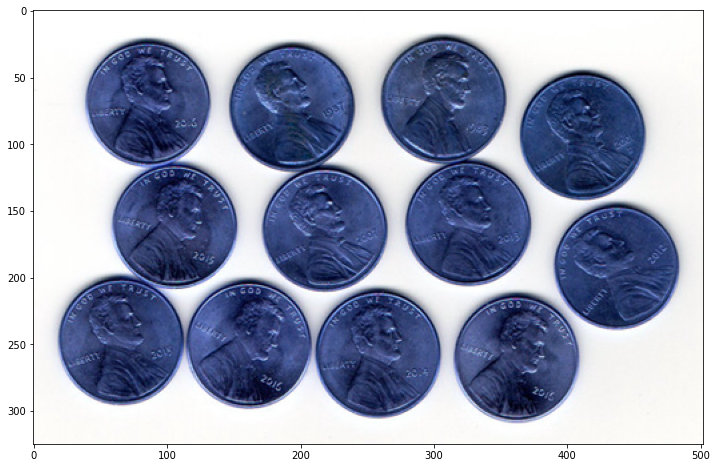

In [6]:
sep_coins = cv2.imread('penny.jpg')
display(sep_coins)

In [0]:
#Median blur
#Grayscale
#Binary threshold
#Find contours

In [0]:
sep_blur = cv2.medianBlur(sep_coins, 7)

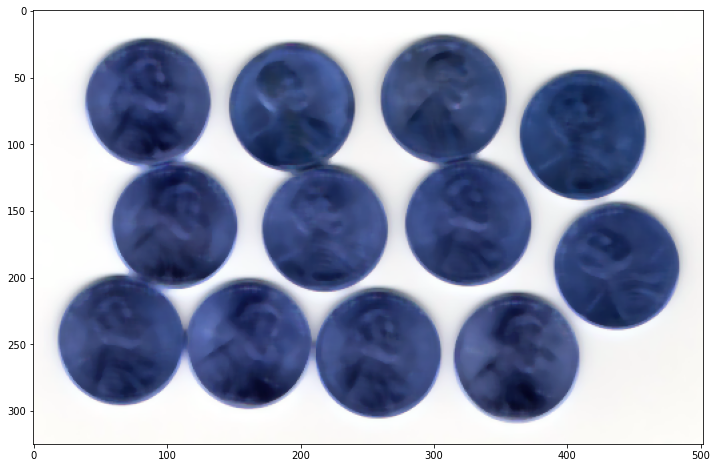

In [14]:
display(sep_blur)

In [0]:
gray_sep_coins = cv2.cvtColor(sep_blur, cv2.COLOR_BGR2GRAY)

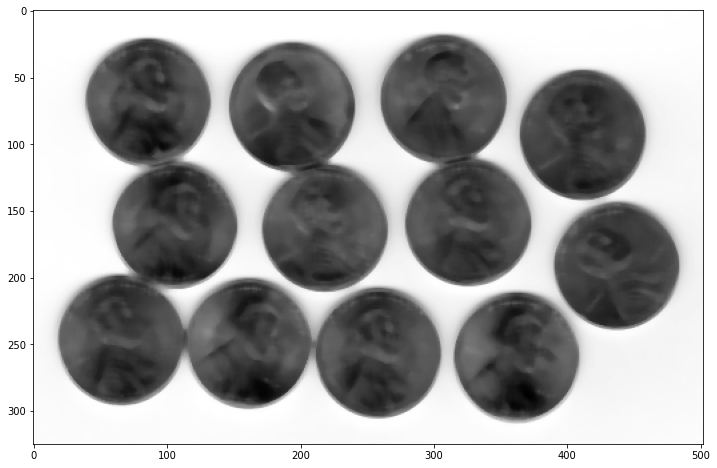

In [16]:
display(gray_sep_coins)

In [0]:
ret, sep_thresh = cv2.threshold(gray_sep_coins, 160, 255, cv2.THRESH_BINARY_INV)

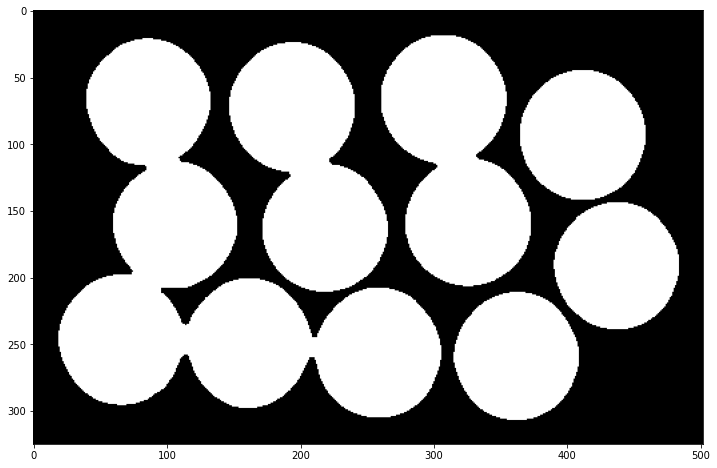

In [18]:
display(sep_thresh)

In [0]:
contours, hierarchy = cv2.findContours(sep_thresh.copy(), cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

In [0]:
for i in range(len(contours)):
  if hierarchy[0][i][3] == -1: #External contour
    cv2.drawContours(sep_coins, contours, i, (255,255,0), 5)

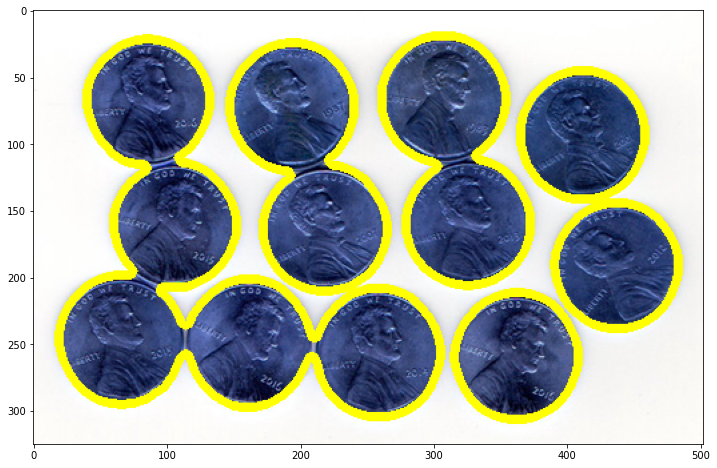

In [25]:
display(sep_coins)

In [0]:
img = cv2.imread('penny.jpg')

In [0]:
img = cv2.medianBlur(img, 11)

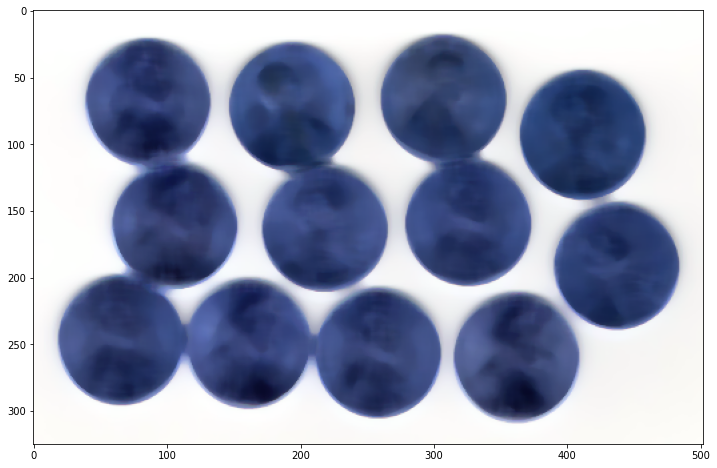

In [34]:
display(img)

In [0]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [0]:
#wywalenie plam z obrazka dodanie otsu
ret, thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

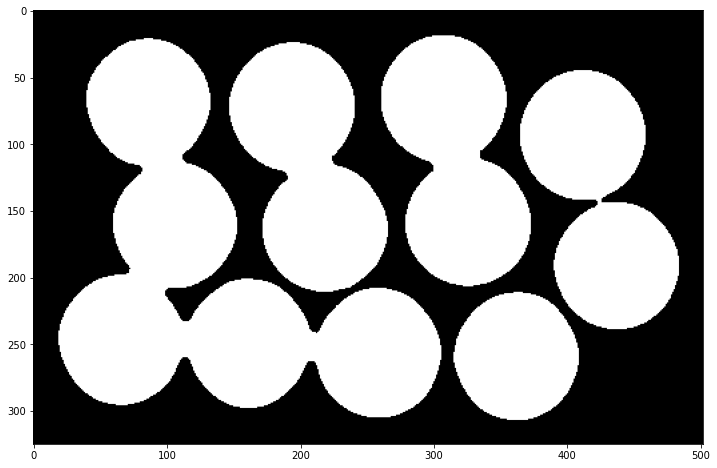

In [39]:
display(thresh)

In [0]:
#NOISE REMOVAL (OPTIONAL)

In [0]:
kernel = np.ones((3, 3), np.uint8)

In [41]:
kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

In [0]:
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN,kernel, iterations = 2)

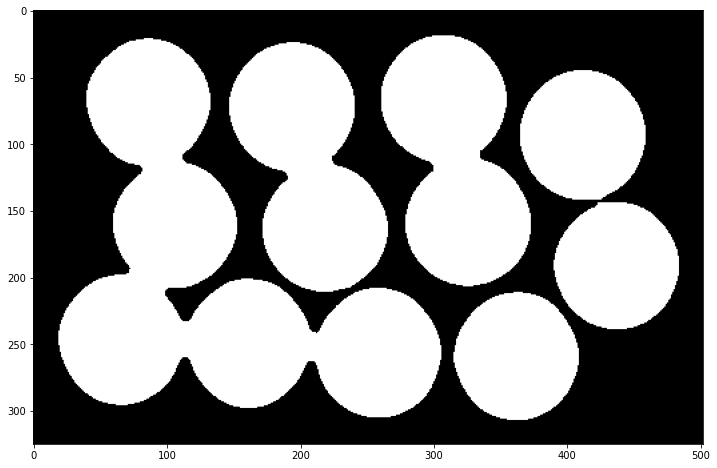

In [43]:
display(opening)

In [0]:
sure_bg = cv2.dilate(opening, kernel, iterations=3)

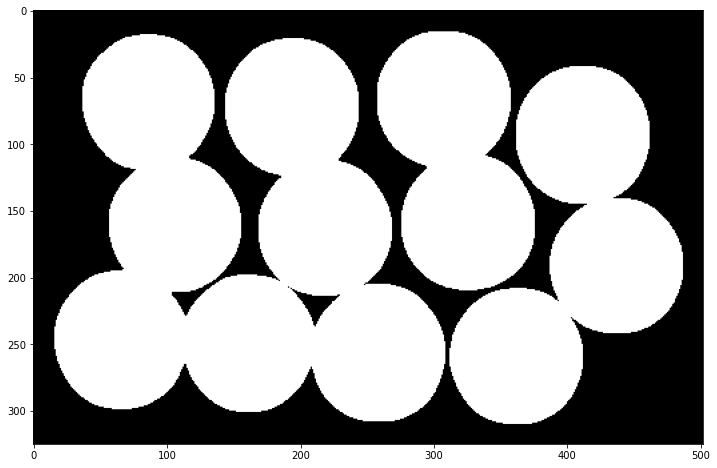

In [52]:
display(sure_bg)

In [0]:
#Distance transform
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)

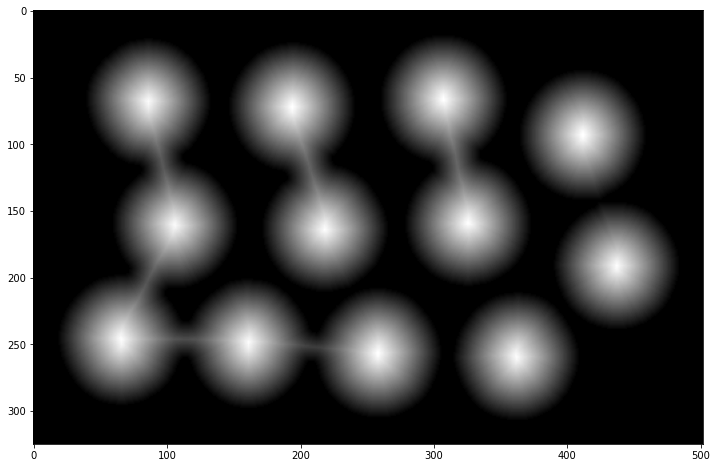

In [45]:
display(dist_transform)

In [0]:
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

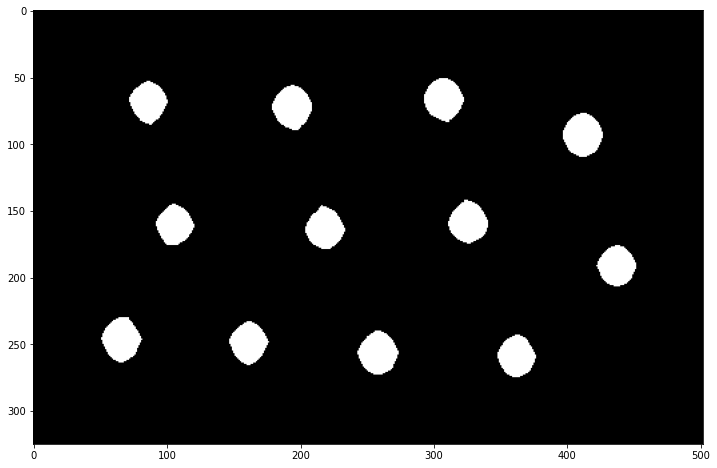

In [49]:
display(sure_fg)

In [0]:
sure

In [0]:
sure_fg = np.uint8(sure_fg)

In [0]:
unknown = cv2.subtract(sure_bg,sure_fg)

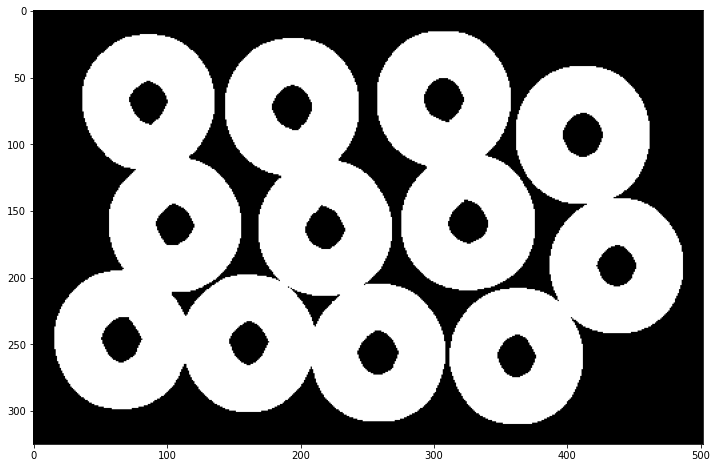

In [55]:
display(unknown)

In [0]:
ret, markers = cv2.connectedComponents(sure_fg)

In [0]:
markers = markers + 1

In [0]:
markers[unknown == 255] = 0

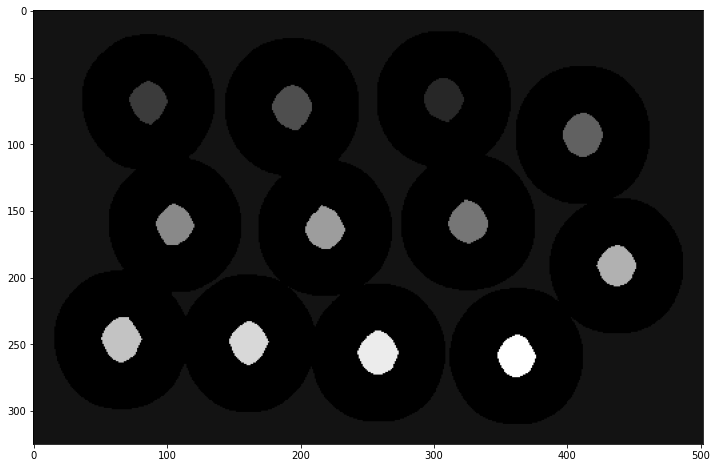

In [60]:
display(markers)

In [0]:
markers = cv2.watershed(img, markers)

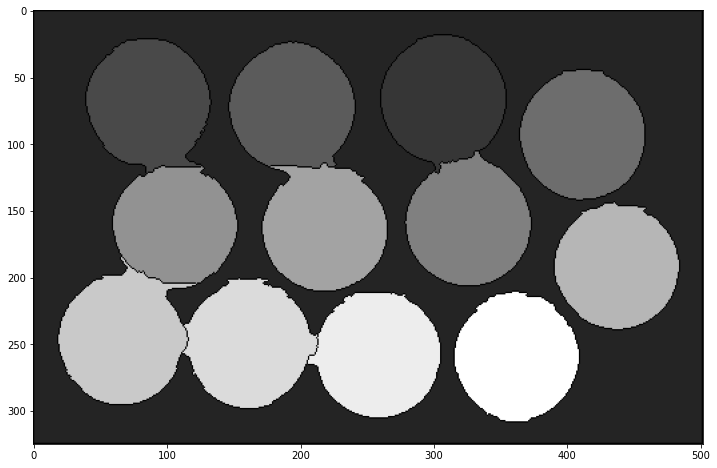

In [62]:
display(markers)

In [0]:
contours, hierarchy = cv2.findContours(markers.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [0]:
for i in range(len(contours)):
  if hierarchy[0][i][3] == -1:
    cv2.drawContours(sep_coins,contours,i,(255,0,0),10)


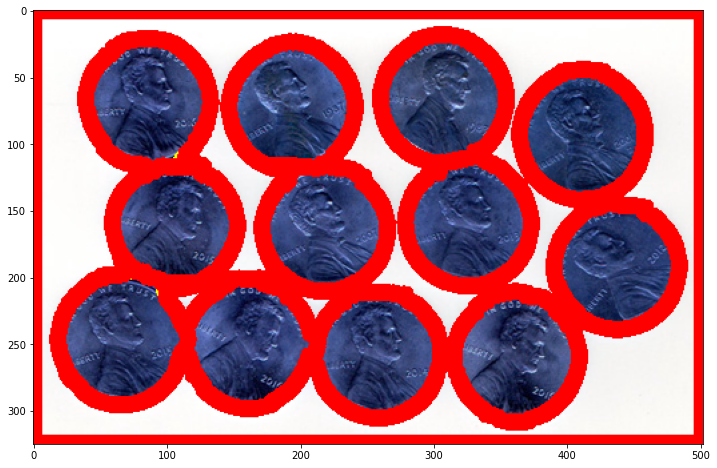

In [66]:
display(sep_coins)